In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from mpl_toolkits import mplot3d
import warnings
import pprint
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Load data

In [89]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [90]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['target'] = pd.Series(boston.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Plot target variable
There are outliers on the right tail

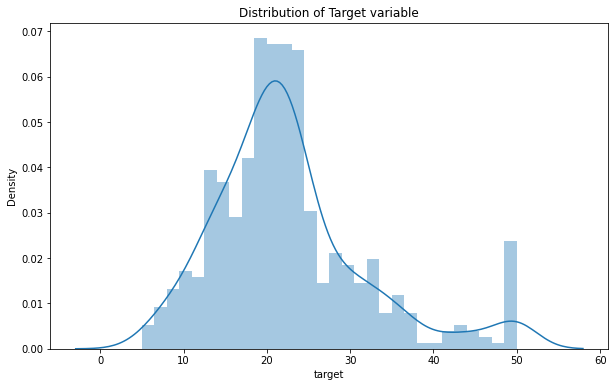

In [92]:
plt.figure(figsize=(10, 6))
sns.distplot(df['target'],bins=30)
plt.title("Distribution of Target variable");

### Plot heatmap of features and target

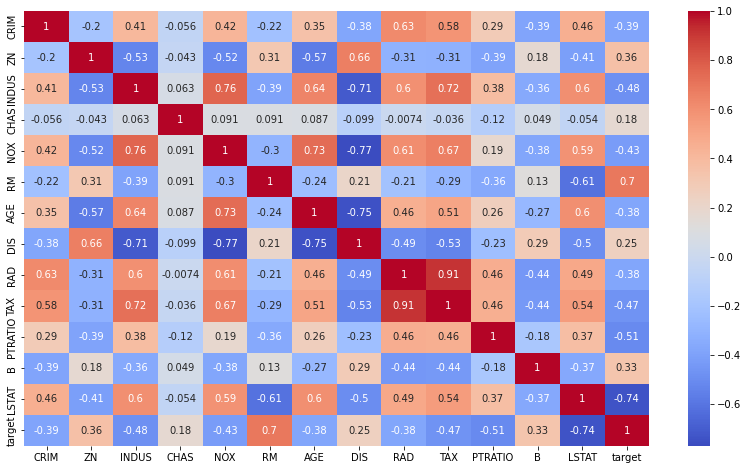

In [93]:
plt.figure(figsize=(14, 8))
corr_matrix  = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True);

### Strong Correlation between RM, LSTAT and Target price
They are linearly correlated

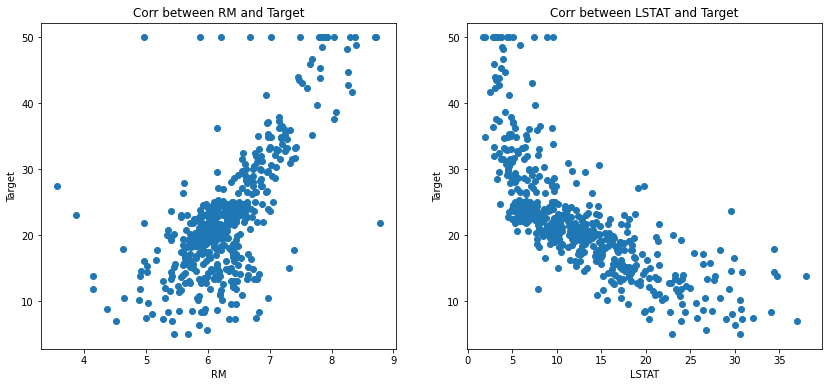

In [94]:
fig,ax= plt.subplots(1,2,figsize=(14,6))
ax[0].scatter(df.RM,df.target);
ax[0].set_title('Corr between RM and Target')
ax[0].set_xlabel('RM')
ax[0].set_ylabel('Target')
ax[1].scatter(df.LSTAT,df.target)
ax[1].set_title('Corr between LSTAT and Target')
ax[1].set_xlabel('LSTAT')
ax[1].set_ylabel('Target');

## Split data into train and test data 

In [95]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Create pipelines
Pipeline with various models that first scales the data.

In [97]:
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('LASSO', KNeighborsRegressor())])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

## Use k-fold to evaluate

In [105]:
results = []
names = []

for name,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.669232 (0.117039)
Lasso: 0.612052 (0.105834)
KNN: 0.708673 (0.104170)
SVR: 0.668767 (0.092215)


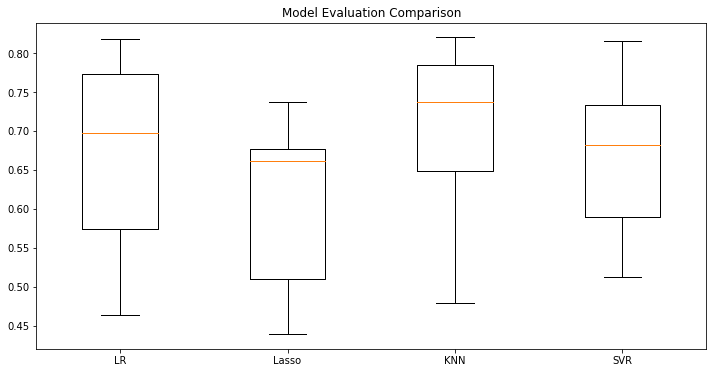

In [129]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('Model Evaluation Comparison')
plt.boxplot(results)
ax.set_xticklabels(names);

## Fit and train a RandomForest

In [136]:
tree = RandomForestRegressor(n_jobs=1,oob_score=True)
tree.fit(X_train,y_train)
print('Test Score: {}'.format(tree.score(X_test,y_test)))

Test Score: 0.8725208675784628


In [137]:
tree.feature_importances_

array([0.04183246, 0.00130151, 0.00656374, 0.00111798, 0.02569282,
       0.44587171, 0.01350553, 0.05129363, 0.0038255 , 0.0194666 ,
       0.01543012, 0.01133065, 0.36276776])

In [150]:
importance = pd.DataFrame(tree.feature_importances_,index=df.columns[:-1]).rename(columns={0:'Importance'})
importance.sort_values(by='Importance',ascending=False)

,Importance
RM,0.445872
LSTAT,0.362768
DIS,0.051294
CRIM,0.041832
NOX,0.025693
TAX,0.019467
PTRATIO,0.015430
AGE,0.013506
B,0.011331
INDUS,0.006564


## It is evident that RM and LSTAT are the most important features that determine prices.